In [0]:
import gym
taxiMap = gym.make("Taxi-v3").env

In [0]:
import numpy as np
Qmap = np.zeros([taxiMap.observation_space.n, taxiMap.action_space.n])

In [31]:
%%time
import random

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

scores = []
epochRate = []
for i in range(100000):
    state = taxiMap.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False
    scores.append(0)
    epochRate.append(0)
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = taxiMap.action_space.sample()
        else:
            action = np.argmax(Qmap[state])
        next_state, reward, done, info = taxiMap.step(action) 
        Qmap[state, action] += alpha * (reward + gamma * np.max(Qmap[next_state]) - Qmap[state, action])
        q_table[state, action] = new_value
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1
        epochRate[-1] = epochs
        scores[-1] += reward
    if (i % 10000 == 0):
        print(f"trial: {i}")

trial: 0
trial: 10000
trial: 20000
trial: 30000
trial: 40000
trial: 50000
trial: 60000
trial: 70000
trial: 80000
trial: 90000
CPU times: user 42 s, sys: 0 ns, total: 42 s
Wall time: 42 s


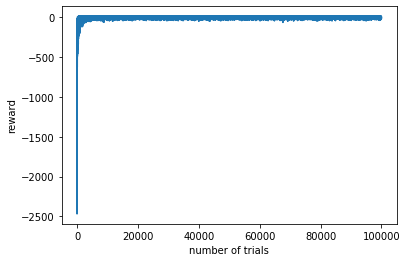

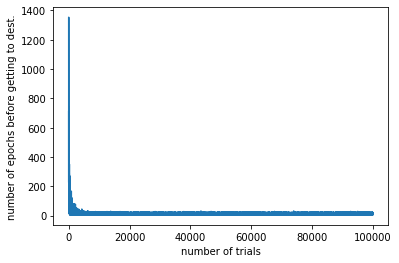

In [41]:
from matplotlib import pyplot as plt
plt.plot(scores)
plt.xlabel('number of trials')
plt.ylabel('reward')
plt.show()
plt.plot(epochRate)
plt.xlabel('number of trials')
plt.ylabel('number of epochs before getting to dest.')
plt.show()

In [36]:
print(f"trial epochs mean: {np.mean(epochRate)}")
print(f"trial epochs median: {np.median(epochRate)}")

trial epochs mean: 15.92877
trial epochs median: 15.0


In [37]:
total_epochs, total_penalties = 0, 0
tests = 100

for _ in range(tests):
    state = taxiMap.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(Qmap[state])
        state, reward, done, info = taxiMap.step(action)
        if reward == -10:
            penalties += 1
        epochs += 1
    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {tests} episodes:")
print(f"Average timesteps per episode: {total_epochs / tests}")
print(f"Average penalties per episode: {total_penalties / tests}")

Results after 100 episodes:
Average timesteps per episode: 13.12
Average penalties per episode: 0.0
